In [23]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Iris.csv")

In [6]:
df.drop(columns="Id", inplace=True)

In [7]:
X= iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [8]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [10]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,4.9,3.1,1.5,0.1,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica


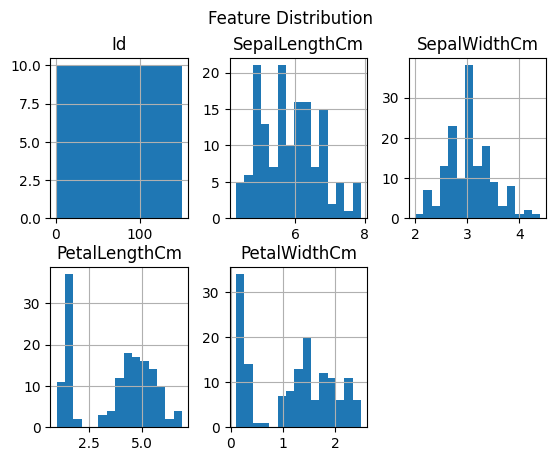

In [20]:
X.hist(bins=15, layout=(2,3))  # Adjust layout to fit all features
plt.suptitle("Feature Distribution")
plt.show()


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [27]:
y_pred = lda.predict(X_test)

In [31]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification report :\n",classification_report(y_test,y_pred,target_names=y.unique()))

Accuracy: 0.28888888888888886
Confusion Matrix: 
 [[ 0  0 19]
 [ 0  0 13]
 [ 0  0 13]]
Classification report :
                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        19
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.29      1.00      0.45        13

       accuracy                           0.29        45
      macro avg       0.10      0.33      0.15        45
   weighted avg       0.08      0.29      0.13        45



D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Assuming `X` has 5 columns, add an extra value for the 5th column or adjust accordingly
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2, 0.0]], columns=X.columns)  # Add a placeholder if necessary
predicted_species = lda.predict(sample)
print(f"Predicted Species: {predicted_species[0]}")


Predicted Species: Iris-virginica


D:\Python\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
